# Regression intuition

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
from mpl_toolkits import mplot3d

In [57]:
X, y = make_regression(n_features=1,noise=10,random_state=42,bias=100)

In [58]:
df = pd.DataFrame(np.hstack((X,y.reshape(-1,1))),columns=['x1','y'])

In [59]:
df['x0'] = 1

In [60]:
df.head()

,x1,y,x0
0,0.931280,150.779929,1
1,0.087047,89.934730,1
2,-1.057711,65.081608,1
3,0.314247,110.526743,1
4,-0.479174,82.261623,1


In [61]:
def plot_regression(x,y,y_hat,figsize=(12,5)):
    fig, ax = plt.subplots(1,2,figsize=figsize)
    
    ax[0].scatter(x, y, label='original')
    ax[0].plot(x, y_hat, 'k.', label='predicted')
    
    ax[1].plot(y, label='original')
    ax[1].plot(y_hat, label='predicted')
    
    plt.legend()

## Fitting a linear regression model

### revisiting psuedo inverse 

\begin{align}
    X \theta = Y\\
    \theta = X^{-1} Y
\end{align}

theta : [101.16511532  44.43716999]


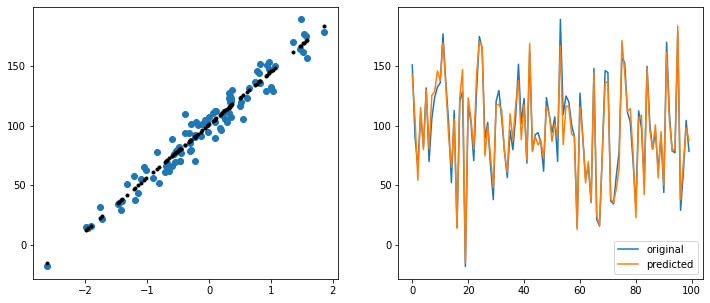

In [62]:
theta = np.linalg.pinv(df[['x0','x1']].values) @ df.y.values
print("theta :",theta)


y_hat = df[['x0','x1']].values @ theta

plot_regression(df.x1,df.y, y_hat)

### revisiting svd and linear systems

theta : [101.16511532  44.43716999]


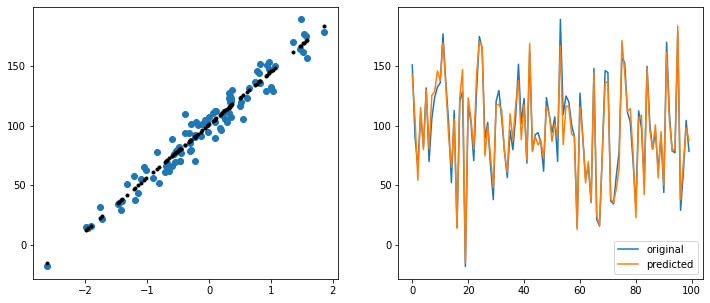

In [63]:
u,s,vT = np.linalg.svd(df[['x0','x1']].values,full_matrices=False) 

theta = vT.T @ np.linalg.pinv(np.diag(s)) @ u.T @ df.y

print("theta :",theta)


y_hat = df[['x0','x1']].values @ theta
plot_regression(df.x1,df.y, y_hat)

### good old sklearn

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model = model.fit(df[['x0','x1']].values,df.y.values)

In [66]:
y_hat = model.predict(df[['x0','x1']].values)

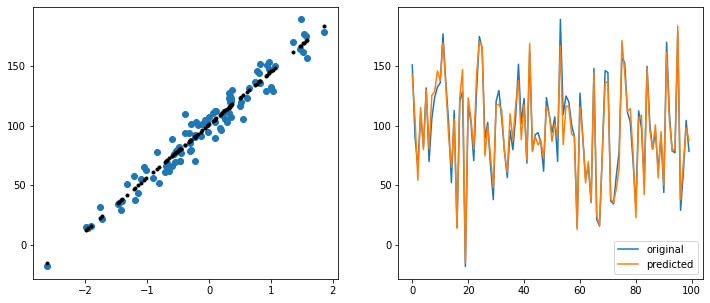

In [67]:
plot_regression(df.x1,df.y, y_hat)

## lets try something with Neural Networks

In [68]:
import tensorflow as tf

### A neural net like perceptron

In [69]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[['x0','x1']].values) # adapt is like fit

In [70]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [71]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_25 (Dense)            (None, 1)                 3         
                                                                 
Total params: 8
Trainable params: 3
Non-trainable params: 5
_________________________________________________________________


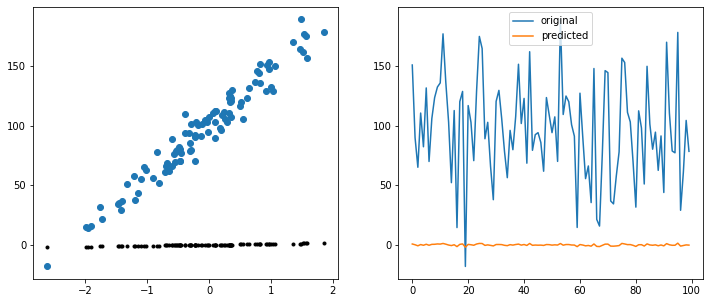

In [72]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

it is not trained yet. so result is understandable.

In [75]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

In [76]:
history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=1000,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

In [77]:
history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

In [78]:
history_metrics.head()

,loss,mse,val_loss,val_mse,epochs
0,11261.544922,11261.544922,9651.478516,9651.478516,0
1,11204.263672,11204.263672,9605.966797,9605.966797,1
2,11152.042969,11152.042969,9560.947266,9560.947266,2
3,11096.733398,11096.733398,9516.607422,9516.607422,3
4,11038.809570,11038.810547,9472.607422,9472.607422,4


<AxesSubplot:xlabel='epochs'>

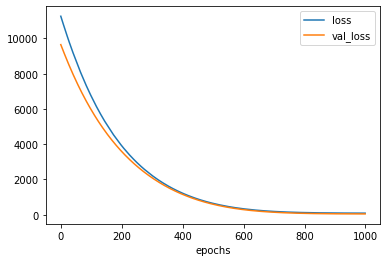

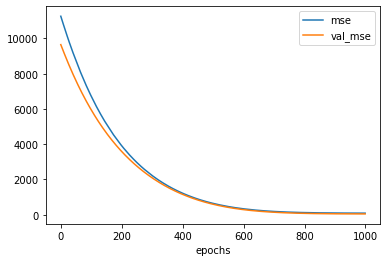

In [81]:
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

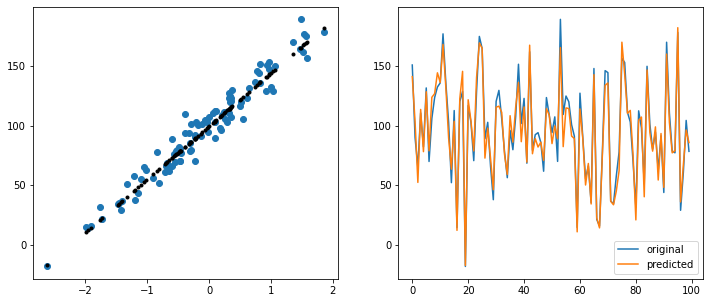

In [82]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

### A little bit deep neural net but no activation functions

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_26 (Dense)            (None, 5)                 15        
                                                                 
 dense_27 (Dense)            (None, 5)                 30        
                                                                 
 dense_28 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


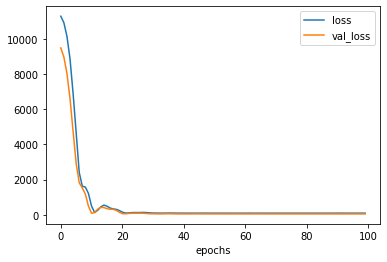

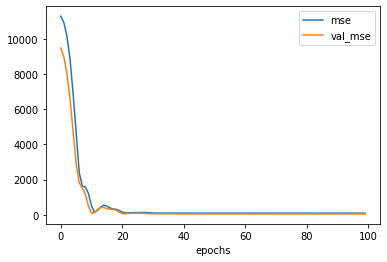

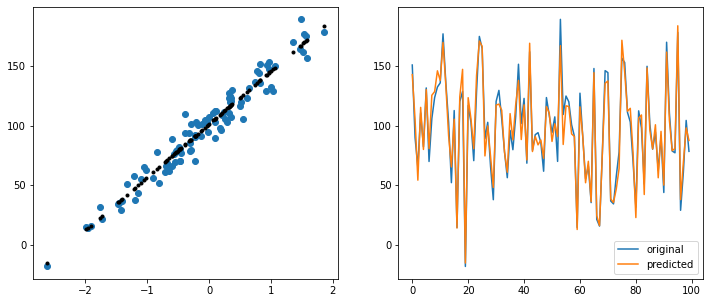

In [83]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

So I didn't introduce any activation/ non-linearity, and it is, no matter how deep the network is, a linear regression model.
Ha Ha Ha

### now a neural net with sigmoid applied

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_29 (Dense)            (None, 5)                 15        
                                                                 
 dense_30 (Dense)            (None, 5)                 30        
                                                                 
 dense_31 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


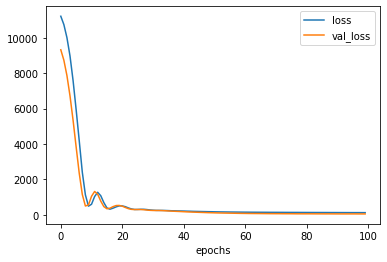

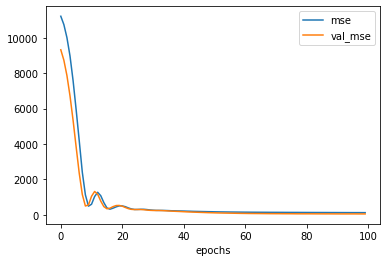

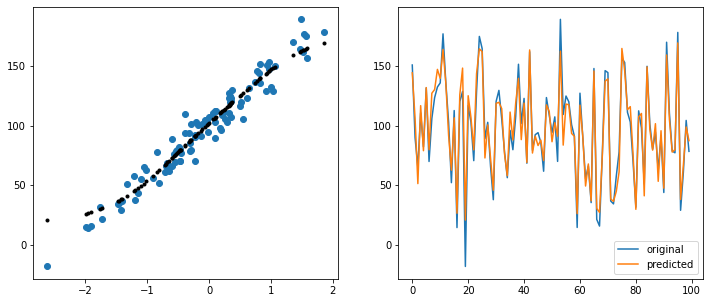

In [84]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

A little bit curved from sigmoid, trying to fit the pattern.

### 2 sigmoids applied in the net

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_32 (Dense)            (None, 5)                 15        
                                                                 
 dense_33 (Dense)            (None, 5)                 30        
                                                                 
 dense_34 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


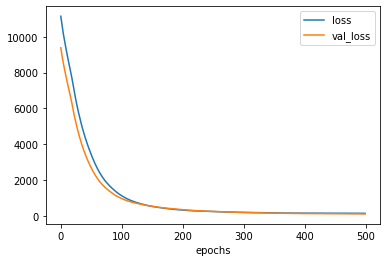

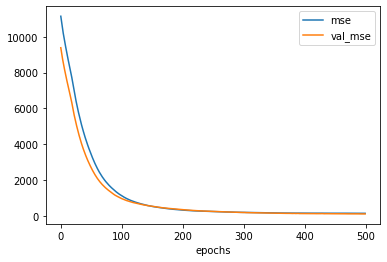

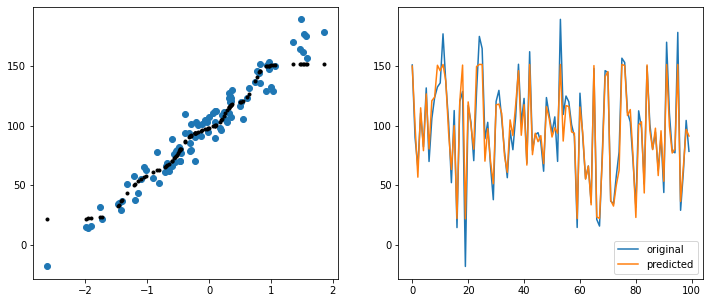

In [85]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=500,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

more curves/ non-linear pattern matching, with increasing sigmoid layers.

## lets try with a little bit complex pattern

In [89]:
X, y = make_regression(n_features=1,noise=20,random_state=42,bias=100,n_samples=500)

df = pd.DataFrame()
df['x1'] = X[...,-1]**3
df['y'] = y
df['x0'] = 1
df.head()

,x1,y,x0
0,-0.528099,57.401862,1
1,0.000913,102.950676,1
2,0.105983,123.553604,1
3,-3.232089,-9.967066,1
4,-0.057206,77.788884,1


<AxesSubplot:xlabel='x1', ylabel='y'>

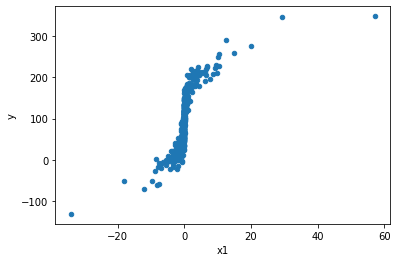

In [90]:
df.plot(x='x1',y='y',kind='scatter')

### a completely linear model for complex data

In [91]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[['x0','x1']].values) # adapt is like fit

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_35 (Dense)            (None, 5)                 15        
                                                                 
 dense_36 (Dense)            (None, 5)                 30        
                                                                 
 dense_37 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


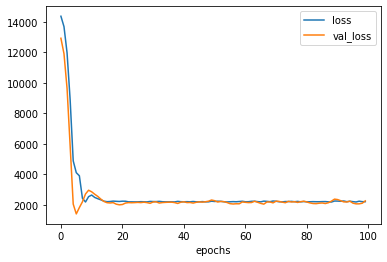

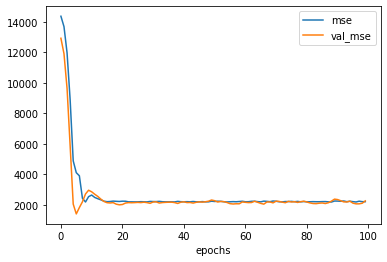

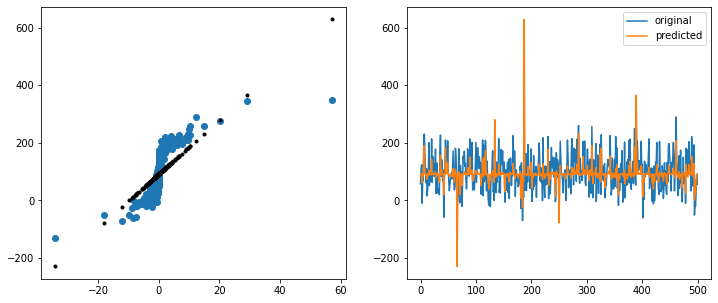

In [92]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=150,
    verbose=0,
    validation_split = 0.2
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

As expected, no matter how deep it is, it matches a linear pattern.

### with a sigmoid introducing non linearity

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_38 (Dense)            (None, 5)                 15        
                                                                 
 dense_39 (Dense)            (None, 5)                 30        
                                                                 
 dense_40 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


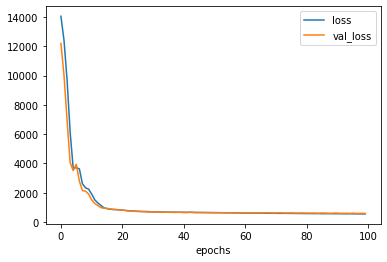

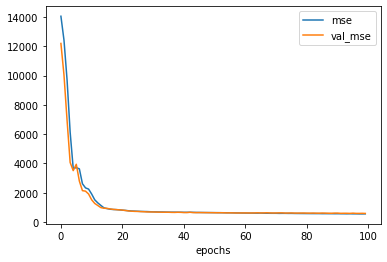

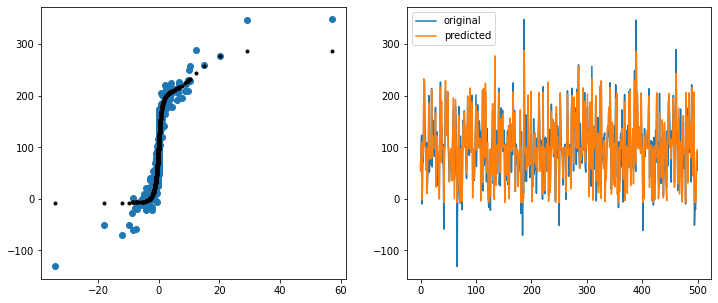

In [93]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5, activation='sigmoid'),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=100,
    verbose=0,
    validation_split = 0.2
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_107 (Dense)           (None, 3)                 9         
                                                                 
 dense_108 (Dense)           (None, 3)                 12        
                                                                 
 dense_109 (Dense)           (None, 3)                 12        
                                                                 
 dense_110 (Dense)           (None, 1)                 4         
                                                                 
Total params: 42
Trainable params: 37
Non-trainable params: 5
_________________________________________________________

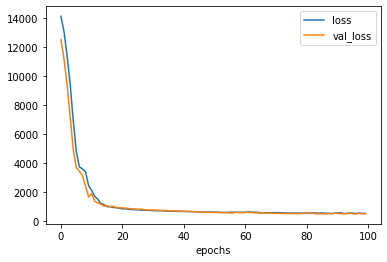

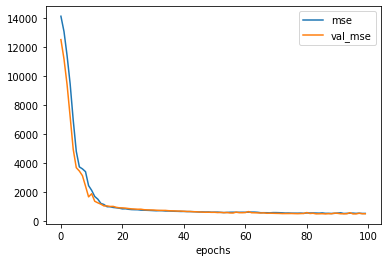

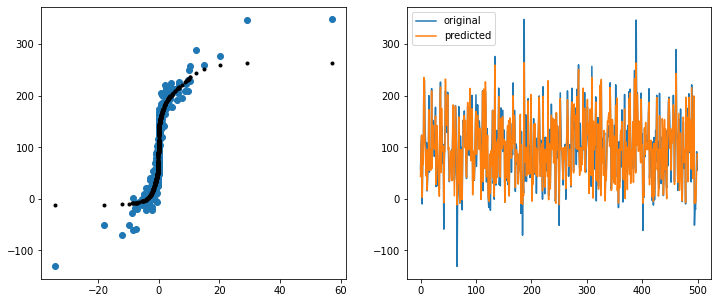

In [114]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=3),
    tf.keras.layers.Dense(units=3, activation='sigmoid'),
    tf.keras.layers.Dense(units=3),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=100,
    verbose=0,
    validation_split = 0.2
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)